In [1]:
import pickle
def read_dic(s):
    with open(s+'.pickle', 'rb') as handle:
        b = pickle.load(handle)
        return b

In [2]:
import networkx as nx
direc = "datasets/"
import os
ll = []
lr = [["astro_ph","u"], ["power_grid", "u"], ["hamster_full","u"], ["linux_mail","d"], ["slashdot", "d"], ["milan", "d"], ["vienna","d"], ["paris","d"] ]
for e in lr:
    g = nx.read_edgelist(direc+e[0]+".edge", create_using=nx.DiGraph, nodetype=int, data=False)
    n = len(g.nodes())* len(g.edges())
    ll.append( [n, e] )
ll.sort()
lr = [  e[1]  for e in ll]

In [3]:
import math
nb_nodes = 1024*16
nb_graphs_er = 5
start = 3
nb_graphs_ba = 3
start_ba = 4
list_grid = [ ( int(math.sqrt(nb_nodes)),int(math.sqrt(nb_nodes))), (4,nb_nodes//4), (16,nb_nodes//16) ]


def repr(i):
    if type(i) == int:
        return str(i)
    else:
        return str(i[0])+"_"+str(i[1])
def name(i):
    if i[0] != "gr":
        return i[0]+"_"+str(i[1])
    else:
        return str(i[1][0])+"_"+str(i[1][1])
    
import networkx as nx
direc = "synthetique_databases/"
import os
ll = []
ls = [("er", i) for i in range(start, nb_graphs_er+start, 2)]
ls += [("ba", i) for i in range(start_ba, nb_graphs_ba+start_ba,2)]
ls += [ ("gr", e) for e in list_grid ]

for x in ls:
    g = nx.read_edgelist(direc + "/" + x[0] +"_" + str(nb_nodes) + "_" + repr(x[1]) + ".edges", create_using=nx.Graph, nodetype=int, data=False)
    n = len(g.nodes())* len(g.edges())
    ll.append( [n, name(x)] )
ll.sort()
ls = [  e[1]  for e in ll]

FileNotFoundError: [Errno 2] No such file or directory: 'synthetique_databases//er_16384_3.edges'

In [68]:
import matplotlib.pyplot as plt
import numpy as np

def plot_bar_chart(data, lr, ls, xlabel, ylabel, legend, filename, dim1 = 8, dim2 = 5, bar_w = 0.15):
    """
    Plots a bar chart where the x-axis is represented by the keys of the dictionary.
    Each key in the dictionary maps to another dictionary with 4 keys representing bars.
    The values are tuples (mean, standard deviation).

    :param data: Dictionary containing the data to plot
    """

    categories = list(data.keys())
    categories = list(map(lambda x : x[0][:3], lr )) + ls
    subcategories = list(next(iter(data.values())).keys())
    
    
    # Number of groups and bars per group
    n_groups = len(categories)
    n_bars = len(subcategories)
    
    fig, ax = plt.subplots(figsize=(dim1, dim2))
    
    # Create figure and axis
    #fig, ax = plt.subplots()

    # Bar width
    bar_width = bar_w

    # X locations for the groups
    index = np.arange(n_groups)
    
    # Iterate through each subcategory and plot the bars
    for i, subcategory in enumerate(subcategories):
        means = [data[category][subcategory][0] for category in categories]
        std_devs = [data[category][subcategory][1] for category in categories]
        ax.bar(index + i * bar_width, means, bar_width, yerr=std_devs, label=subcategory)

    # Add labels, title, and legend
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(legend)
    ax.set_xticks(index + bar_width * (n_bars - 1) / 2)
    ax.set_xticklabels(categories)
    ax.legend()


    # Show plot
    plt.rcParams.update({'font.size': 13})
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()
    plt.close()

# # Example usage:
# data = {
#     'A': {'bar1': (5, 1), 'bar2': (6, 1.5), 'bar3': (7, 2), 'bar4': (8, 2.5)},
#     'B': {'bar1': (4, 1.2), 'bar2': (5, 1.3), 'bar3': (6, 1.8), 'bar4': (7, 2.1)},
#     'C': {'bar1': (3, 0.8), 'bar2': (4, 1.1), 'bar3': (5, 1.6), 'bar4': (6, 2.0)}
# }

# data = {i:  { e: calculate_mean_and_std(d[i][e])   for e in algos }  for i in list_p}

# plot_bar_chart(data)

In [69]:
queries_real = read_dic("dics/queries_real")
queries_synth = read_dic("dics/queries_synth")
pre_real = read_dic("dics/pre_comp_real")
pre_synth = read_dic("dics/pre_computation_synth")

In [70]:
del queries_synth["er_4"]
del queries_synth["er_6"]
del queries_synth["ba_5"]
del pre_synth["er_4"]
del pre_synth["er_6"]
del pre_synth["ba_5"]
ls.remove("er_4")
ls.remove("er_6")
ls.remove("ba_5")

In [71]:
queries = queries_real | queries_synth
pre = pre_real | pre_synth

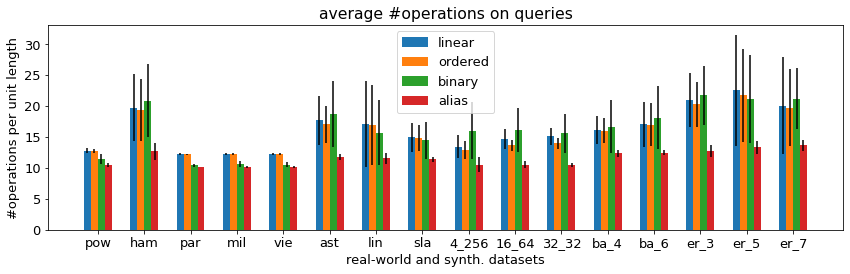

In [79]:
plot_bar_chart(queries, lr, ls, "real-world and synth. datasets", "#operations per unit length", "average #operations on queries", "queries.pdf", dim1 = 12, dim2 = 4)

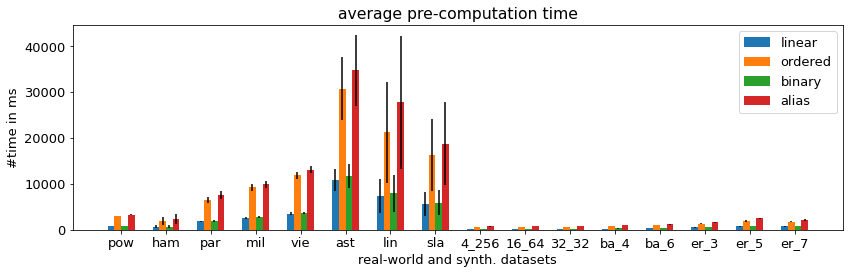

In [80]:
plot_bar_chart(pre, lr, ls, "real-world and synth. datasets", "#time in ms", "average pre-computation time", "pre_comp.pdf",  dim1 = 12, dim2 = 4)